In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.cluster import KMeans
import wandb

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
load_path = "/data/user/tourist/mixed-percision-quantization-for-SwinIR/scripts/x.pt"

x = torch.load(load_path)
x.shape
b = x.clone()
b.shape

/tmp/ipykernel_1086651/583069422.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x = torch.load(load_path)


torch.Size([2048, 64, 60])

In [4]:
loadd_path = "/data/user/tourist/mixed-percision-quantization-for-SwinIR/scripts/xweight.pt"
weight = torch.load(loadd_path)
weight = weight.T[:, :60]
weight.shape

/tmp/ipykernel_1086651/721549285.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weight = torch.load(loadd_path)


torch.Size([60, 60])

In [5]:
from basicsr.smooth_networks import smooth_network


net = smooth_network(weight, 30).cuda()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: dehui-wang2005 (dehui-wang2005-shanghai-jiaotong-university). Use `wandb login --relogin` to force relogin


In [6]:
net.inited(x)

/home/tourist/.conda/envs/Mix-SwinIR/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
XA, BW = net(x)

In [9]:
from basicsr.draw_3d_plot import draw_3d_plot

draw_3d_plot(XA)

KeyboardInterrupt: 

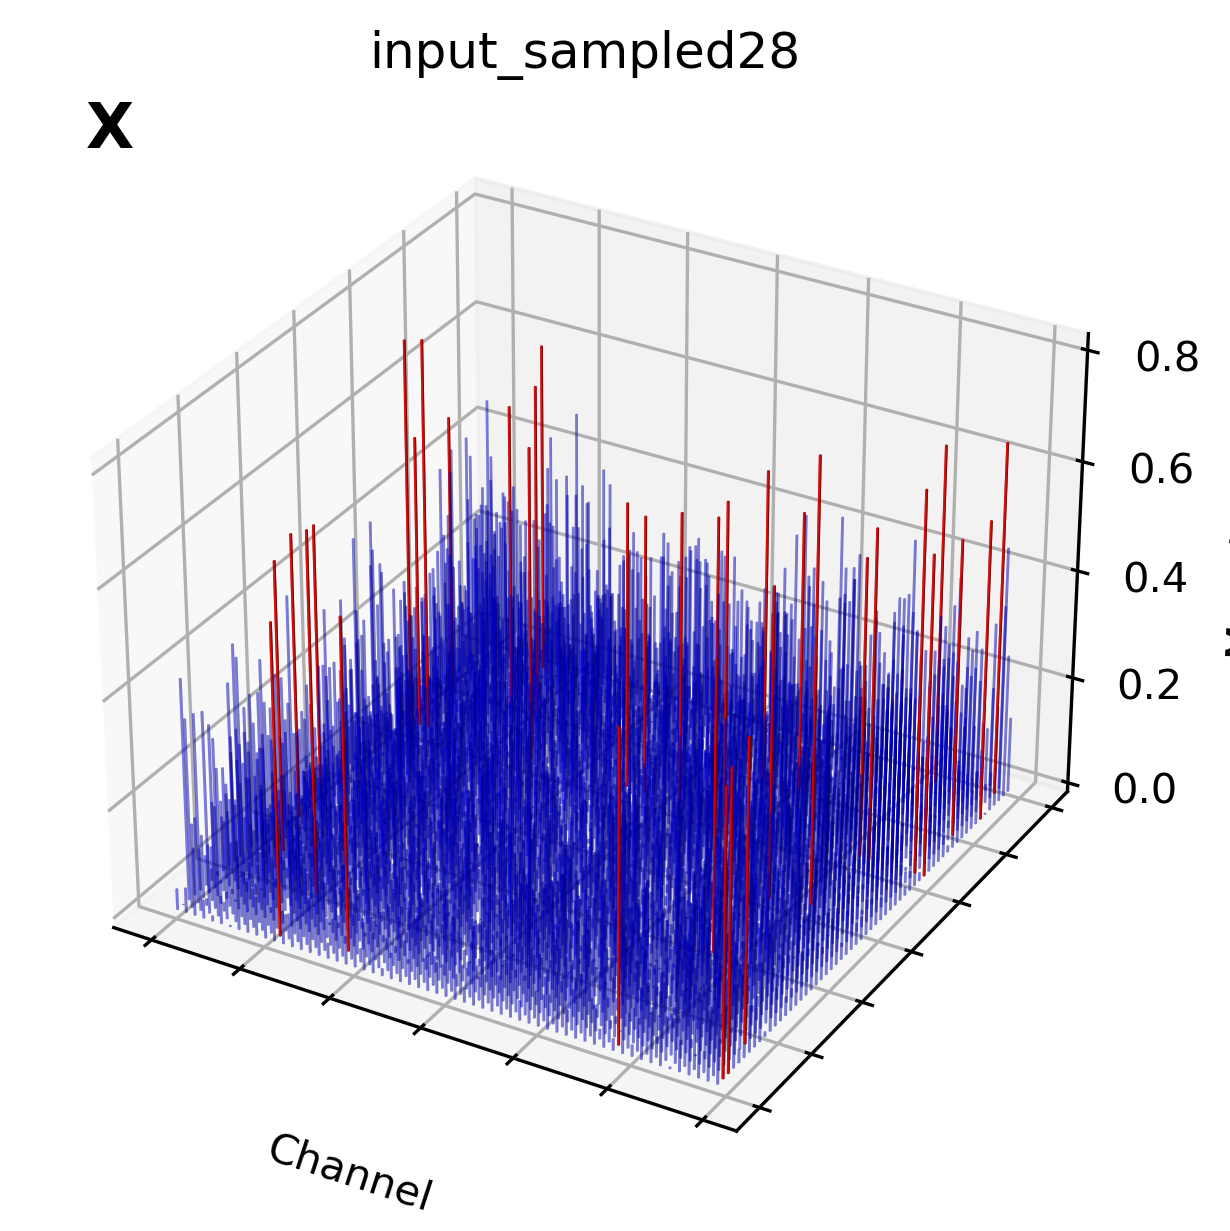

In [9]:
draw_3d_plot(BW)